In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import geopandas as gpd
import plotly as px
import json

In [2]:
out_df = pd.read_csv('aug_22_out_prem_zip.csv')

print(out_df.info())

out_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38873 entries, 0 to 38872
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   premise_id        38873 non-null  int64 
 1   SERVICE_ZIP_CD    38873 non-null  int64 
 2   start_datetime    38873 non-null  object
 3   restore_datetime  38873 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.2+ MB
None


,premise_id,SERVICE_ZIP_CD,start_datetime,restore_datetime
0,112740402,60195,2022-08-26T10:00,2022-08-26T11:00
1,112706602,60195,2022-08-26T10:00,2022-08-26T11:00
2,112706202,60195,2022-08-26T10:00,2022-08-26T11:00
3,112739802,60195,2022-08-26T10:00,2022-08-26T11:00
4,112706502,60195,2022-08-26T10:00,2022-08-26T11:00


In [3]:
out_df['start_char_length'] = out_df['start_datetime'].str.len()
out_df['restore_char_length'] = out_df['restore_datetime'].str.len()

out_df.head()

,premise_id,SERVICE_ZIP_CD,start_datetime,restore_datetime,start_char_length,restore_char_length
0,112740402,60195,2022-08-26T10:00,2022-08-26T11:00,16,16
1,112706602,60195,2022-08-26T10:00,2022-08-26T11:00,16,16
2,112706202,60195,2022-08-26T10:00,2022-08-26T11:00,16,16
3,112739802,60195,2022-08-26T10:00,2022-08-26T11:00,16,16
4,112706502,60195,2022-08-26T10:00,2022-08-26T11:00,16,16


In [4]:
# Making sure datetimes are all similar lengths

out_df['start_char_length'].value_counts()

19    28419
16    10454
Name: start_char_length, dtype: int64

In [5]:
out_df[(out_df['start_char_length'] == 16)]

,premise_id,SERVICE_ZIP_CD,start_datetime,restore_datetime,start_char_length,restore_char_length
0,112740402,60195,2022-08-26T10:00,2022-08-26T11:00,16,16
1,112706602,60195,2022-08-26T10:00,2022-08-26T11:00,16,16
2,112706202,60195,2022-08-26T10:00,2022-08-26T11:00,16,16
3,112739802,60195,2022-08-26T10:00,2022-08-26T11:00,16,16
4,112706502,60195,2022-08-26T10:00,2022-08-26T11:00,16,16
...,...,...,...,...,...,...
38494,329934902,60068,2022-08-27T20:50,2022-08-27T21:00,16,16
38495,329920802,60068,2022-08-27T20:50,2022-08-27T21:00,16,16
38496,329936102,60068,2022-08-27T20:50,2022-08-27T21:00,16,16
38497,329960902,60068,2022-08-27T20:50,2022-08-27T21:00,16,16


In [6]:
out_df[(out_df['start_char_length'] == 19)]

,premise_id,SERVICE_ZIP_CD,start_datetime,restore_datetime,start_char_length,restore_char_length
21,219869302,60048,2022-08-28T18:15:39,2022-08-28T23:30,19,16
22,219869502,60048,2022-08-28T18:15:39,2022-08-28T23:30,19,16
23,219869802,60048,2022-08-28T18:15:39,2022-08-28T23:30,19,16
24,685629802,60540,2022-08-25T14:30:04,2022-08-25T17:21,19,16
25,685637902,60540,2022-08-25T14:30:04,2022-08-25T17:21,19,16
...,...,...,...,...,...,...
38868,715664502,60561,2022-08-25T06:37:25,2022-08-25T09:11,19,16
38869,715672102,60561,2022-08-25T06:37:25,2022-08-25T09:11,19,16
38870,917049102,60514,2022-08-25T06:37:25,2022-08-25T09:11,19,16
38871,715663802,60561,2022-08-25T06:37:25,2022-08-25T09:11,19,16


In [7]:
# difference is some datetimes have seconds.
# checking if restore column has the same 16/19 char lengths

out_df['restore_char_length'].value_counts()

16    21276
19    17597
Name: restore_char_length, dtype: int64

In [8]:
out_df['start_datetime'] = out_df['start_datetime'].astype(str).str[:16]
out_df['restore_datetime'] = out_df['restore_datetime'].astype(str).str[:16]

out_df['start_char_length'] = out_df['start_datetime'].str.len()
out_df['restore_char_length'] = out_df['restore_datetime'].str.len()

In [9]:
out_df['start_char_length'].value_counts()

16    38873
Name: start_char_length, dtype: int64

In [10]:
out_df.head()

,premise_id,SERVICE_ZIP_CD,start_datetime,restore_datetime,start_char_length,restore_char_length
0,112740402,60195,2022-08-26T10:00,2022-08-26T11:00,16,16
1,112706602,60195,2022-08-26T10:00,2022-08-26T11:00,16,16
2,112706202,60195,2022-08-26T10:00,2022-08-26T11:00,16,16
3,112739802,60195,2022-08-26T10:00,2022-08-26T11:00,16,16
4,112706502,60195,2022-08-26T10:00,2022-08-26T11:00,16,16


In [11]:
# dropping the 2 temporary char_length columns

out_df = out_df.drop(['start_char_length', 'restore_char_length'], axis=1)

In [12]:
out_df.sort_values(by=['start_datetime', 'restore_datetime'])

,premise_id,SERVICE_ZIP_CD,start_datetime,restore_datetime
12172,356408402,61108,2022-08-25T00:47,2022-08-25T01:22
12173,356427602,61108,2022-08-25T00:47,2022-08-25T01:22
12174,356428602,61108,2022-08-25T00:47,2022-08-25T01:22
12175,356428202,61108,2022-08-25T00:47,2022-08-25T01:22
12176,356427802,61108,2022-08-25T00:47,2022-08-25T01:22
...,...,...,...,...
24775,306460802,61109,2022-08-29T03:30,2022-08-29T04:20
24776,314850402,61109,2022-08-29T03:30,2022-08-29T04:20
24777,314850902,61109,2022-08-29T03:30,2022-08-29T04:20
24786,306461802,61109,2022-08-29T03:30,2022-08-29T04:20


In [13]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38873 entries, 0 to 38872
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   premise_id        38873 non-null  int64 
 1   SERVICE_ZIP_CD    38873 non-null  int64 
 2   start_datetime    38873 non-null  object
 3   restore_datetime  38873 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


In [14]:
# Start and Restore datetime columns aren't datetime format
# Adding time to repair column

out_df['start_datetime']= pd.to_datetime(out_df['start_datetime'])
out_df['restore_datetime']= pd.to_datetime(out_df['restore_datetime'])

out_df['time_delta'] = out_df['restore_datetime'] - out_df['start_datetime']

out_df.head()

,premise_id,SERVICE_ZIP_CD,start_datetime,restore_datetime,time_delta
0,112740402,60195,2022-08-26 10:00:00,2022-08-26 11:00:00,0 days 01:00:00
1,112706602,60195,2022-08-26 10:00:00,2022-08-26 11:00:00,0 days 01:00:00
2,112706202,60195,2022-08-26 10:00:00,2022-08-26 11:00:00,0 days 01:00:00
3,112739802,60195,2022-08-26 10:00:00,2022-08-26 11:00:00,0 days 01:00:00
4,112706502,60195,2022-08-26 10:00:00,2022-08-26 11:00:00,0 days 01:00:00


In [15]:
# Double checking start and restore times from 3rd cell 

temp = out_df[out_df['premise_id'] == 112740402]
temp.head()

,premise_id,SERVICE_ZIP_CD,start_datetime,restore_datetime,time_delta
0,112740402,60195,2022-08-26 10:00:00,2022-08-26 11:00:00,0 days 01:00:00


In [16]:
del temp 

temp_out_df = out_df.copy()

temp_out_df['start_datetime'] = pd.to_datetime(temp_out_df['start_datetime'].astype(str).str[:10])
temp_out_df['restore_datetime'] = pd.to_datetime(temp_out_df['restore_datetime'].astype(str).str[:10])

temp_out_df.head()

,premise_id,SERVICE_ZIP_CD,start_datetime,restore_datetime,time_delta
0,112740402,60195,2022-08-26,2022-08-26,0 days 01:00:00
1,112706602,60195,2022-08-26,2022-08-26,0 days 01:00:00
2,112706202,60195,2022-08-26,2022-08-26,0 days 01:00:00
3,112739802,60195,2022-08-26,2022-08-26,0 days 01:00:00
4,112706502,60195,2022-08-26,2022-08-26,0 days 01:00:00


In [17]:
temp = temp_out_df.copy()

temp2= temp.groupby(["SERVICE_ZIP_CD", "start_datetime"])["premise_id"].count().reset_index()

temp2.head()

,SERVICE_ZIP_CD,start_datetime,premise_id
0,60001,2022-08-28,2
1,60002,2022-08-28,2
2,60004,2022-08-26,114
3,60004,2022-08-28,1
4,60005,2022-08-25,1


In [18]:
temp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SERVICE_ZIP_CD  419 non-null    int64         
 1   start_datetime  419 non-null    datetime64[ns]
 2   premise_id      419 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 9.9 KB


TESTING MAPPING

In [19]:
# il_zip = json.load(open('il_illinois_zip_codes_geo.min.json','r'))

In [20]:
df_zipcodes = gpd.read_file('cb_2019_us_zcta510_500k.shp', encoding='utf-8')

In [21]:
df_zipcodes

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,35586,8600000US35586,35586,472581657,892816,"MULTIPOLYGON (((-88.00160 33.81101, -88.00258 ..."
1,72454,8600000US72454,72454,263532032,775633,"POLYGON ((-90.41711 36.36553, -90.41686 36.390..."
2,71653,8600000US71653,71653,817752215,89308151,"POLYGON ((-91.45936 33.30273, -91.45758 33.381..."
3,19963,8600000US19963,19963,276290156,21123546,"POLYGON ((-75.50557 38.92751, -75.50313 38.927..."
4,81303,8600000US81303,81303,557450510,6445737,"POLYGON ((-108.04031 37.09764, -108.03896 37.1..."
...,...,...,...,...,...,...
33139,17003,8600000US17003,17003,123199815,508564,"POLYGON ((-76.66433 40.44901, -76.66015 40.451..."
33140,16051,8600000US16051,16051,100692312,7867364,"MULTIPOLYGON (((-80.16969 40.89718, -80.16599 ..."
33141,16066,8600000US16066,16066,57882926,29055,"POLYGON ((-80.15256 40.74410, -80.13838 40.744..."
33142,44065,8600000US44065,44065,56416483,1584985,"POLYGON ((-81.29782 41.44013, -81.28772 41.439..."


In [22]:
df_zipcodes.rename(columns={'ZCTA5CE10':'SERVICE_ZIP_CD'}, inplace = True)

In [23]:
df_zipcodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33144 entries, 0 to 33143
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   SERVICE_ZIP_CD  33144 non-null  object  
 1   AFFGEOID10      33144 non-null  object  
 2   GEOID10         33144 non-null  object  
 3   ALAND10         33144 non-null  int64   
 4   AWATER10        33144 non-null  int64   
 5   geometry        33144 non-null  geometry
dtypes: geometry(1), int64(2), object(3)
memory usage: 1.5+ MB


In [24]:
df_zipcodes['SERVICE_ZIP_CD'] = df_zipcodes['SERVICE_ZIP_CD'].astype(str).astype(int)

In [25]:
df_merge = temp2.merge(df_zipcodes, on='SERVICE_ZIP_CD',how='left')

df_merge

,SERVICE_ZIP_CD,start_datetime,premise_id,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,60001,2022-08-28,2,NaN,NaN,NaN,NaN,None
1,60002,2022-08-28,2,8600000US60002,60002,84399204.0,12444497.0,"MULTIPOLYGON (((-87.97208 42.47247, -87.97040 ..."
2,60004,2022-08-26,114,8600000US60004,60004,28705004.0,70451.0,"POLYGON ((-88.01698 42.15369, -88.00447 42.153..."
3,60004,2022-08-28,1,8600000US60004,60004,28705004.0,70451.0,"POLYGON ((-88.01698 42.15369, -88.00447 42.153..."
4,60005,2022-08-25,1,8600000US60005,60005,16986569.0,106656.0,"MULTIPOLYGON (((-87.95636 42.03581, -87.95048 ..."
...,...,...,...,...,...,...,...,...
414,61367,2022-08-28,3,8600000US61367,61367,120753016.0,395329.0,"POLYGON ((-89.38202 41.62823, -89.36266 41.628..."
415,61378,2022-08-28,238,8600000US61378,61378,153470988.0,304639.0,"POLYGON ((-89.24341 41.75807, -89.24121 41.758..."
416,61554,2022-08-28,1,8600000US61554,61554,180281756.0,1948586.0,"POLYGON ((-89.73088 40.52570, -89.71518 40.535..."
417,61764,2022-08-25,28,8600000US61764,61764,421389975.0,2592468.0,"POLYGON ((-88.81576 40.97408, -88.81552 40.985..."


In [26]:
df_merge.geometry.isnull().sum()

3

In [27]:
df_merge = df_merge.dropna(how='any',axis=0) 

In [28]:
df_merge.geometry.isnull().sum()

0

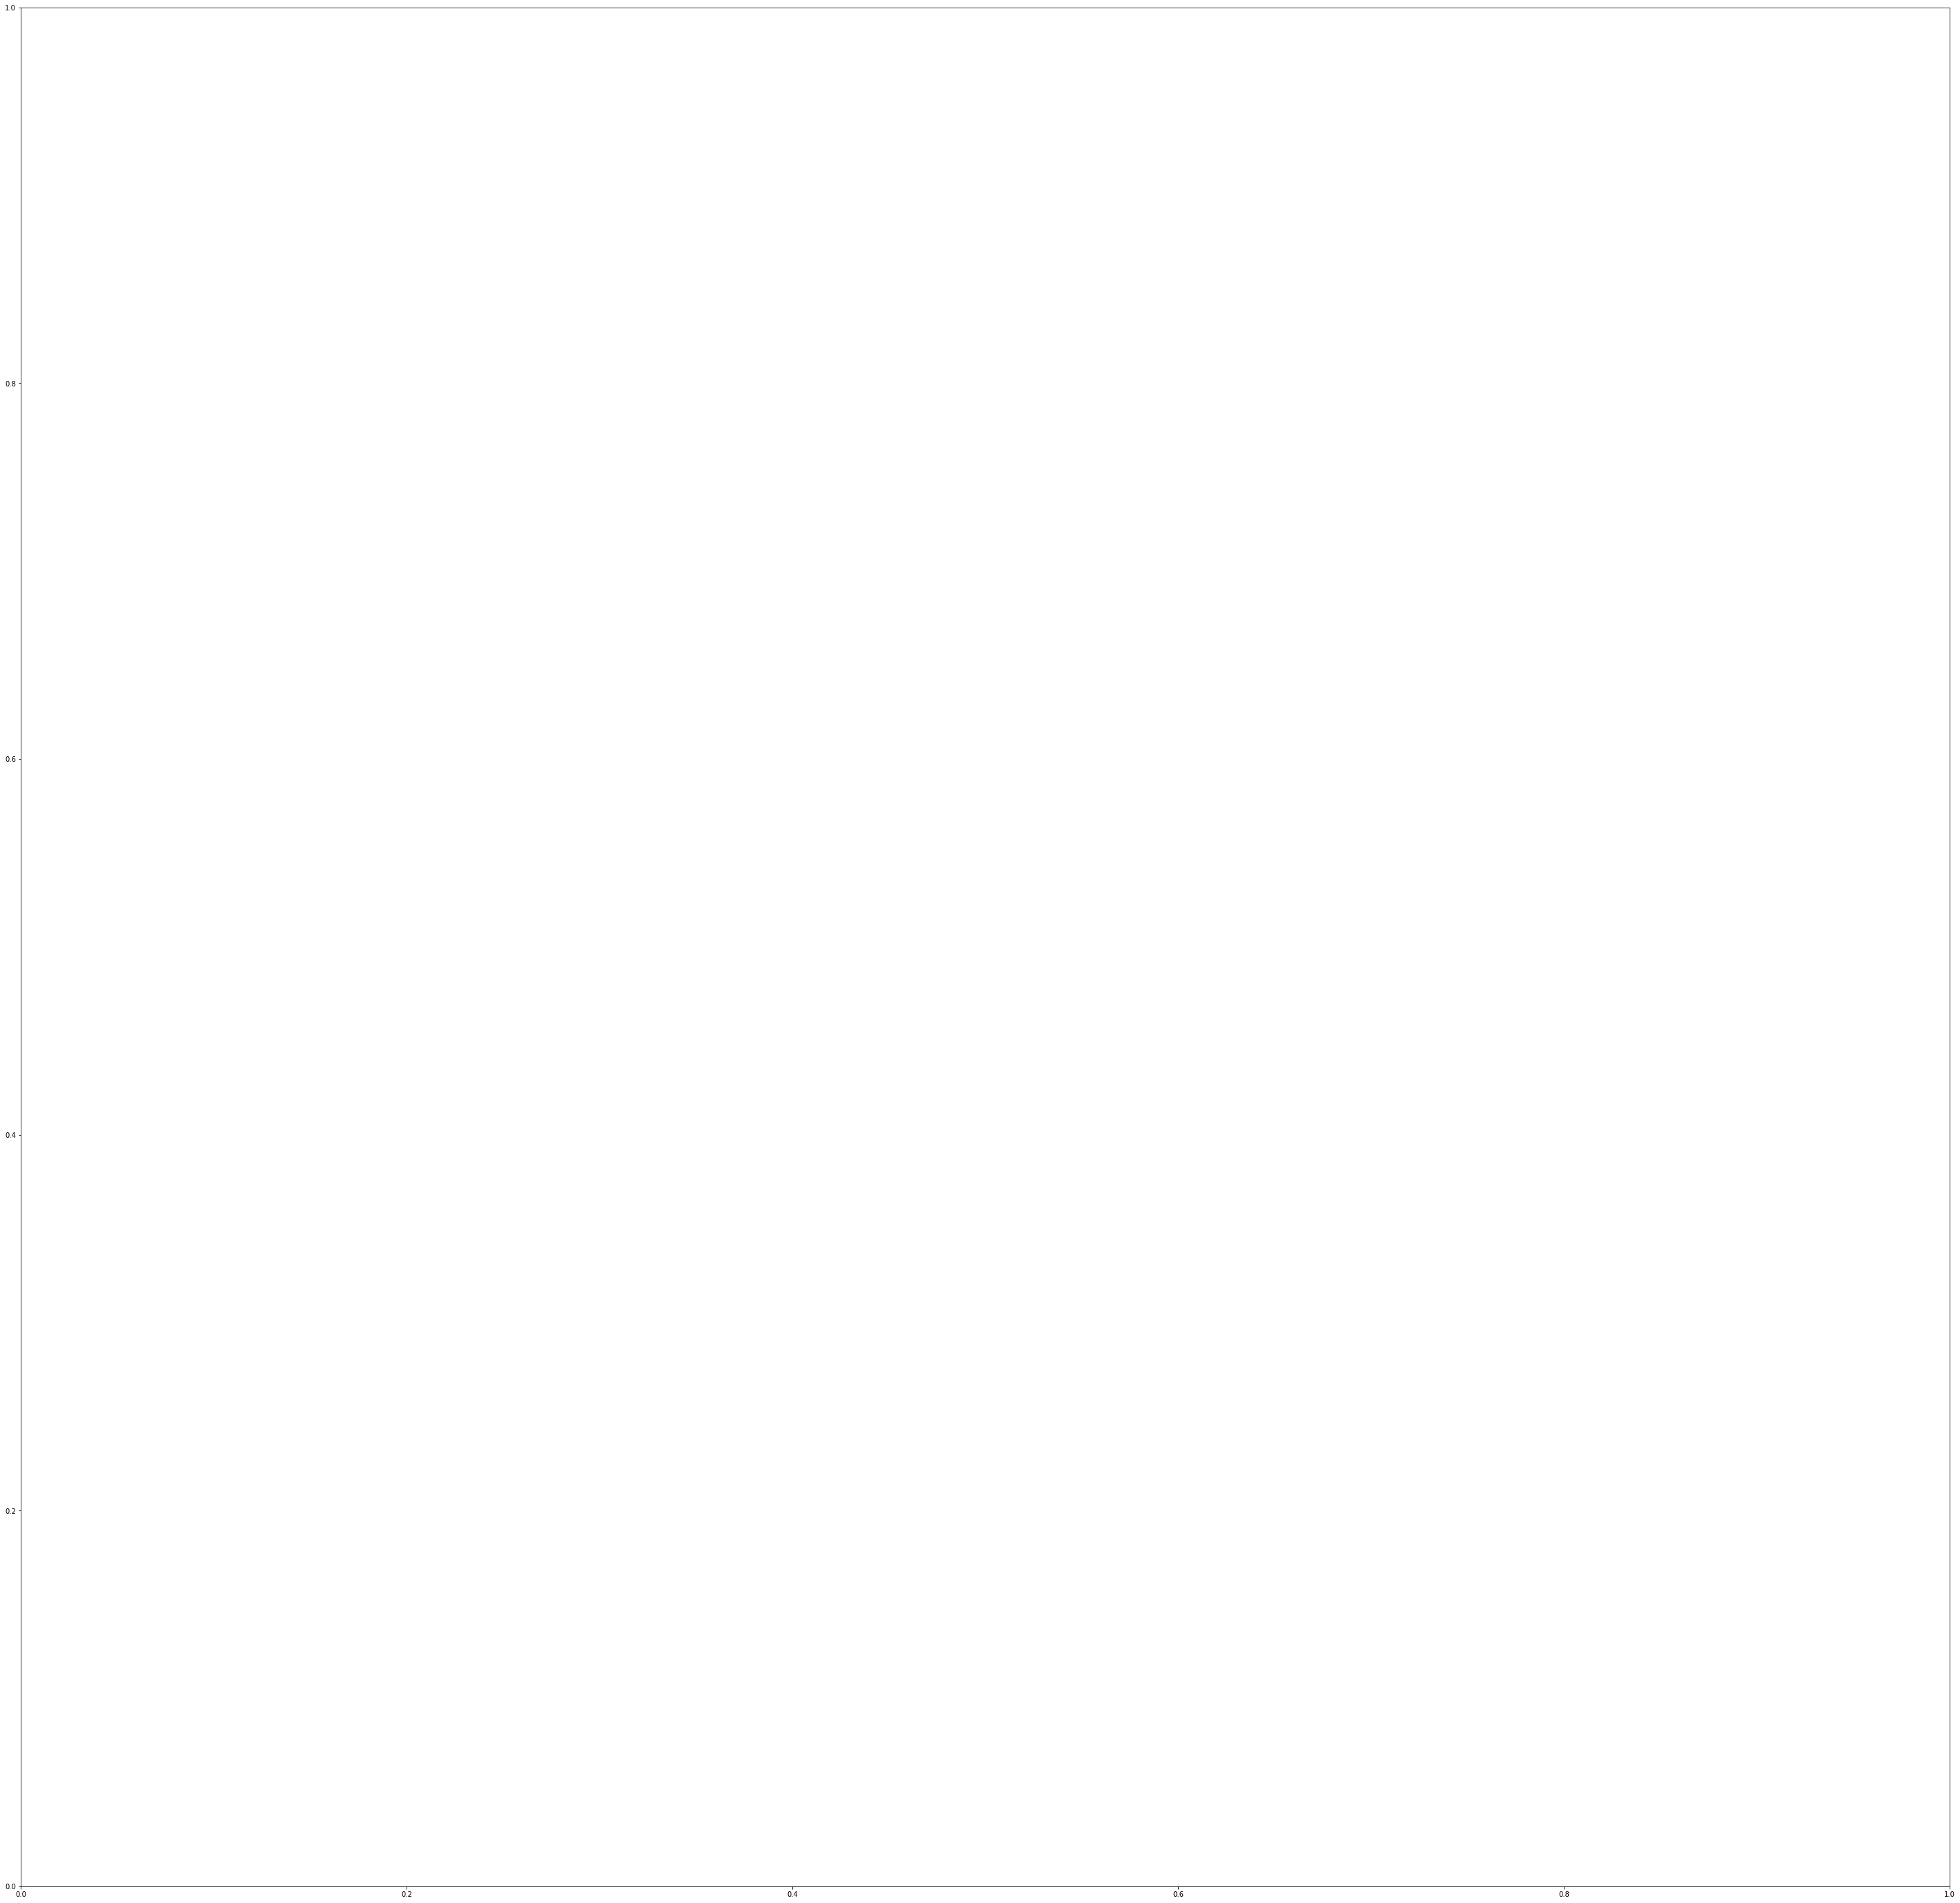

In [29]:
fig, ax = plt.subplots(1, figsize=(50,50) )
df_merge.plot